# Trabajo práctico integrador

**Nombre**: Rodrigo Pazos

## Primera Parte (Clase 1 y 2)

In [229]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Primer ejercicio

Dada una matriz en formato *numpy array*, donde cada fila de la matriz representa un vector matemático, se requiere computar las normas $l_0$, $l_1$, $l_2$, $l_{\infty}$, según la siguientes definiciones:

\begin{equation}
    ||\mathbf{x}||^{p} = \bigg(\sum_{j=1}^{n}{|x_i|^p}\bigg)^{\frac{1}{p}}
\end{equation}

con los casos especiales para $p=0$ y $p=\infty$ siendo:

\begin{equation}
    \begin{array}{rcl}
        ||\mathbf{x}||_0 & = & \bigg(\sum_{j=1 \wedge x_j != 0}{|x_i|}\bigg)\\
        ||\mathbf{x}||_{\infty} & = & \max_{i}{|x_i|}\\
    \end{array}
\end{equation}

In [230]:
array0 = np.matrix([[0, 0], [0, 0]])
array1 = np.matrix([[1, 0], [1, 1]])
array2 = np.matrix([[1, 2], [3, 4]])
array3 = np.matrix([[-1, 2], [3, -4]])

In [231]:
def norm_p(vector, p: int) -> float:
  if p == 0:
    return np.count_nonzero(vector)
  else:
    abs = np.absolute(vector)
    abs_and_pow = np.power(abs, p)
    sum = np.sum(abs_and_pow)
    return np.power(sum, 1/p)


def norm_inf(vector) -> float:
    return np.abs(vector).max()

In [232]:
print("Norm 0 Array 0 = ", norm_p(array0, 0))
print("Norm 0 Array 1 = ", norm_p(array1, 0))
print("Norm 0 Array 2 = ", norm_p(array2, 0))
print("Norm 0 Array 3 = ", norm_p(array3, 0))

print("Norm 1 Array 0 = ", norm_p(array0, 1))
print("Norm 1 Array 1 = ", norm_p(array1, 1))
print("Norm 1 Array 2 = ", norm_p(array2, 1))
print("Norm 1 Array 3 = ", norm_p(array3, 1))

print("Norm 2 Array 0 = ", norm_p(array0, 2))
print("Norm 2 Array 1 = ", norm_p(array1, 2))
print("Norm 2 Array 2 = ", norm_p(array2, 2))
print("Norm 2 Array 3 = ", norm_p(array3, 2))

print("Norm Inf Array 0 = ", norm_inf(array0))
print("Norm Inf Array 1 = ", norm_inf(array1))
print("Norm Inf Array 2 = ", norm_inf(array2))
print("Norm Inf Array 3 = ", norm_inf(array3))

Norm 0 Array 0 =  0
Norm 0 Array 1 =  3
Norm 0 Array 2 =  4
Norm 0 Array 3 =  4
Norm 1 Array 0 =  0.0
Norm 1 Array 1 =  3.0
Norm 1 Array 2 =  10.0
Norm 1 Array 3 =  10.0
Norm 2 Array 0 =  0.0
Norm 2 Array 1 =  1.7320508075688772
Norm 2 Array 2 =  5.477225575051661
Norm 2 Array 3 =  5.477225575051661
Norm Inf Array 0 =  0
Norm Inf Array 1 =  1
Norm Inf Array 2 =  4
Norm Inf Array 3 =  4


### Segundo Ejercicio

En clasificación contamos con dos arreglos, la “verdad” y la “predicción”. Cada elemento de los arreglos pueden tomar dos valores, “True” (representado por 1) y “False” (representado por 0). Entonces podemos definir 4 variables:

* True Positive (TP): El valor verdadero es 1 y el valor predicho es 1
* True Negative (TN): El valor verdadero es 0 y el valor predicho es 0
* False Positive (FP): El valor verdadero es 0 y el valor predicho es 1
* False Negative (FN): El valor verdadero es 1 y el valor predicho es 0

A partir de esto definimos:

* Precision = TP / (TP + FP)
* Recall = TP / (TP + FN)
* Accuracy = (TP + TN) / (TP + TN + FP + FN)
 
Calcular las 3 métricas con Numpy y operaciones vectorizadas.

In [233]:
truth = np.array([1,1,0,1,1,1,0,0,0,1])
prediction = np.array([1,1,1,1,0,0,1,1,0,0])

In [234]:
negative = 0.0
positive = 1.0

tpl = lambda t, p: np.sum(np.logical_and(p == positive, t == positive))
tnl = lambda t, p: np.sum(np.logical_and(p == negative, t == negative))
fpl = lambda t, p: np.sum(np.logical_and(p == positive, t == negative))
fnl = lambda t, p: np.sum(np.logical_and(p == negative, t == positive))

def precision (t, p):
    tp = tpl(t, p)
    fp = fpl(t, p)
    return tp/ (tp + fp)

def recall (t, p):
    tp = tpl(t, p)
    fn = fnl(t, p)
    return tp/ (tp + fn)

def accuracy (t, p):
    tp = tpl(t, p)
    fp = fpl(t, p)
    tn = tnl(t, p)
    fn = fnl(t, p)
    return (tp + tn) / (tp + fp + tn + fn)


In [235]:
print(precision(truth, prediction))
print(recall(truth, prediction))
print(accuracy(truth, prediction))

0.5
0.5
0.4


### Tercer y Cuarto Ejercicio

Para este ejercicio vamos a considerar los siguientes datasets:

* [HAR](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) (Ejercicio 3)
* [MNIST](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) (Ejercicio 4)

1. Aplicar PCA (validar que se cumplan las condiciones), ¿Cuántas componentes necesitamos para explicar el 80% de la varianza?
2. Gráficar la variación acumulada para cada caso.
3. Utilizando [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Agrupar el dataset transformado (ejercicio de PCA) y agrupar en clusters de $k=6$ (ej 3) y $k=10$ (ej 4). Luego en ambos casos probar con $k=2$.
4. Graficar los resultados con los distintos k's usando las primeras dos componentes principales como ejes x,y.
5. Explique. ¿Cuál fue la ganancia de usar PCA en conjunto con k-means?

#### HAR

In [236]:
X_train_har = pd.read_csv('./data/har/Train/X_train.txt', sep=" ", header=None)
y_train_har = pd.read_csv('./data/har/Train/y_train.txt', sep=" ", header=None)

In [237]:
X_train_har

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.012236,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,0.202804,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,0.440079,-0.404427,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271
3,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,-0.798477,...,0.430891,-0.138373,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826
4,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,-0.801982,...,0.137735,-0.366214,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7762,0.048048,-0.042445,-0.065884,-0.195448,-0.278326,-0.219954,-0.282233,-0.305861,-0.357803,0.267874,...,-0.008381,-0.596760,-0.879026,-0.190437,0.829718,0.206972,-0.425619,-0.792292,0.238580,0.056020
7763,0.037639,0.006430,-0.044345,-0.235372,-0.302680,-0.232843,-0.322483,-0.354464,-0.345592,0.181271,...,0.209452,-0.404418,-0.684496,0.064907,0.875679,-0.879033,0.400219,-0.772288,0.252653,0.056252
7764,0.037451,-0.002724,0.021009,-0.218281,-0.378082,-0.076950,-0.304446,-0.400661,-0.193071,0.113141,...,0.237003,0.000207,-0.317314,0.052806,-0.266724,0.864404,0.701169,-0.779566,0.249121,0.047071
7765,0.044011,-0.004536,-0.051242,-0.219202,-0.383350,-0.081035,-0.310419,-0.380233,-0.201007,0.166671,...,0.069366,0.037919,-0.356579,-0.101360,0.700740,0.936674,-0.589479,-0.785603,0.246409,0.031700


In [238]:
y_train_har

,0
0,5
1,5
2,5
3,5
4,5
...,...
7762,2
7763,2
7764,2
7765,2


In [239]:
X_train_har.describe()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
count,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,...,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000
mean,0.038759,-0.000647,-0.018155,-0.599017,-0.634424,-0.691270,-0.623886,-0.657884,-0.740154,-0.360200,...,0.161745,-0.316548,-0.625132,0.016774,0.018471,0.009239,-0.005184,-0.485936,0.050310,-0.052888
std,0.101996,0.099974,0.089927,0.441481,0.367558,0.321641,0.418113,0.348005,0.272619,0.499259,...,0.237319,0.313899,0.302581,0.331326,0.443540,0.601208,0.477218,0.509278,0.300866,0.276196
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.958535,-1.000000,-1.000000,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.987874
25%,0.032037,-0.011209,-0.028448,-0.992140,-0.983570,-0.984661,-0.992902,-0.984131,-0.986661,-0.795613,...,0.020312,-0.548129,-0.843966,-0.108225,-0.261002,-0.470267,-0.373565,-0.810953,-0.047752,-0.140560
50%,0.038975,-0.002921,-0.019602,-0.914202,-0.827970,-0.827696,-0.924421,-0.838559,-0.852735,-0.717007,...,0.170819,-0.353980,-0.710071,0.017627,0.029079,0.001515,-0.005503,-0.706619,0.176777,0.004583
75%,0.044000,0.004303,-0.011676,-0.246026,-0.313069,-0.450478,-0.294903,-0.362671,-0.540521,0.054178,...,0.316240,-0.137462,-0.503837,0.167695,0.314876,0.496871,0.352690,-0.488765,0.246834,0.109507
max,1.000000,1.000000,1.000000,1.000000,0.945956,1.000000,1.000000,0.960341,1.000000,1.000000,...,1.000000,0.938491,0.911653,1.000000,1.000000,0.998702,0.991288,1.000000,0.482229,1.000000


Se debe escalar las diferentes columnas de forma de que la media sea cero para todas

In [240]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_har)

X_train_scaled = pd.DataFrame(scaler.transform(X_train_har))

X_train_scaled.describe()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
count,7.767000e+03,7.767000e+03,7.767000e+03,7.767000e+03,7.767000e+03,7.767000e+03,7.767000e+03,7.767000e+03,7.767000e+03,7.767000e+03,...,7.767000e+03,7.767000e+03,7.767000e+03,7.767000e+03,7.767000e+03,7.767000e+03,7.767000e+03,7.767000e+03,7.767000e+03,7.767000e+03
mean,-1.280752e-17,-2.287057e-19,3.887996e-18,1.097787e-16,2.268760e-16,-7.318581e-18,8.050439e-17,-2.195574e-17,9.514155e-17,-1.463716e-17,...,-6.769687e-17,-7.684510e-17,-3.805662e-16,-2.835950e-17,-2.470021e-17,2.835950e-17,2.195574e-17,-3.659291e-18,1.829645e-17,-2.927432e-17
std,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,...,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00
min,-1.018496e+01,-9.996818e+00,-1.091893e+01,-9.083275e-01,-9.946708e-01,-9.599211e-01,-8.996075e-01,-9.831413e-01,-9.532070e-01,-1.281583e+00,...,-4.720861e+00,-2.177435e+00,-1.238980e+00,-2.998311e+00,-2.296382e+00,-1.678794e+00,-2.084750e+00,-1.009462e+00,-3.491183e+00,-3.385450e+00
25%,-6.590591e-02,-1.056615e-01,-1.144731e-01,-8.905237e-01,-9.499672e-01,-9.122275e-01,-8.826294e-01,-9.375399e-01,-9.042743e-01,-8.721753e-01,...,-5.959983e-01,-7.378017e-01,-7.232702e-01,-3.772946e-01,-6.301371e-01,-7.976222e-01,-7.719837e-01,-6.382323e-01,-3.259530e-01,-3.174488e-01
50%,2.115662e-03,-2.275413e-02,-1.609764e-02,-7.139740e-01,-5.266055e-01,-4.241829e-01,-7.188349e-01,-5.192078e-01,-4.129886e-01,-7.147213e-01,...,3.823538e-02,-1.192538e-01,-2.807331e-01,2.573079e-03,2.391942e-02,-1.284874e-02,-6.678792e-04,-4.333527e-01,4.203704e-01,2.080929e-01
75%,5.139000e-02,4.950966e-02,7.205382e-02,7.996125e-01,8.743530e-01,7.486807e-01,7.868795e-01,8.483553e-01,7.323256e-01,8.300392e-01,...,6.510426e-01,5.705579e-01,4.008963e-01,4.555345e-01,6.683168e-01,8.111383e-01,7.499659e-01,-5.555129e-03,6.532382e-01,5.880061e-01
max,9.424906e+00,1.000975e+01,1.132272e+01,3.622172e+00,4.299950e+00,5.258585e+00,3.884094e+00,4.650307e+00,6.383499e+00,2.724613e+00,...,3.532406e+00,3.998477e+00,5.079250e+00,2.967740e+00,2.213089e+00,1.645897e+00,2.088222e+00,2.917918e+00,1.435677e+00,3.812355e+00


No es cero estricto pero ahora las columnas estan centradas en cero.

In [241]:
from sklearn.decomposition import PCA

components = 30
 
pca = PCA(n_components=components)
 
pca_features = pca.fit_transform(X_train_scaled)
 
print('Shape before PCA: ', X_train_scaled.shape)
print('Shape after PCA: ', pca_features.shape)
 
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=[f'PC{i + 1}' for i in range(components)])

pca_df['target'] = y_train_har

pca_df

Shape before PCA:  (7767, 561)
Shape after PCA:  (7767, 30)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,target
0,-16.377207,2.362095,3.081042,0.845189,7.081123,2.037662,-0.512668,-2.911343,-6.096364,-2.918711,...,2.667036,-2.086717,-1.122089,0.126877,-1.700285,-0.417747,-1.643442,0.269280,-2.089150,5
1,-15.507294,2.014159,-0.701465,2.661068,4.623337,0.339758,0.354948,0.298043,-1.195958,-0.366080,...,0.784914,-0.516749,0.375946,-0.374080,0.730490,-1.490116,0.359472,1.616518,-0.166636,5
2,-15.358292,3.141507,-1.503304,3.200092,4.345076,0.170986,1.052910,0.336719,-0.720460,-0.756382,...,0.769301,0.178066,0.242425,0.192616,0.066512,-0.530208,0.070791,0.028528,-0.028550,5
3,-15.602822,4.475094,-0.958898,2.055206,3.575912,-0.310504,1.399426,0.150035,-1.214408,-1.730406,...,1.158672,0.400617,-2.000721,-0.690429,-1.006592,-1.554216,0.578698,-1.307560,0.739396,5
4,-15.772433,4.952421,-1.028271,2.277497,3.773277,-0.520347,1.165845,1.617938,0.385683,0.731145,...,-1.416733,0.136901,0.051282,0.447273,-0.929505,0.978967,1.202561,0.056996,-0.148789,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7762,14.644918,-10.812529,-2.096197,3.515898,-0.594285,-0.817270,-4.819751,1.882738,2.435917,1.835897,...,-0.436357,-0.781367,-0.825958,-0.415040,-2.568349,-1.072916,-1.989991,0.035452,0.190614,2
7763,13.416917,-8.858111,-0.965888,2.789613,0.684601,-1.690690,-5.223277,0.650687,-0.455617,1.475237,...,-0.772177,-1.075030,-1.242568,-0.401929,-1.127133,-2.298594,-0.800665,-0.371748,-0.968728,2
7764,13.453921,-10.862195,-0.191025,4.028074,-0.931093,-1.893746,-5.742229,2.654878,-1.389283,-0.373218,...,0.692832,-2.930975,-2.288814,-0.514024,-1.268645,-0.717286,0.875814,-1.934067,-0.465021,2
7765,11.990697,-12.458353,-1.842226,4.903289,-2.652750,-1.578951,-5.746464,3.358119,-0.376395,0.005923,...,0.244775,-0.392916,-1.224209,-0.248315,-0.456632,-0.357885,0.537526,-1.583935,-0.011822,2


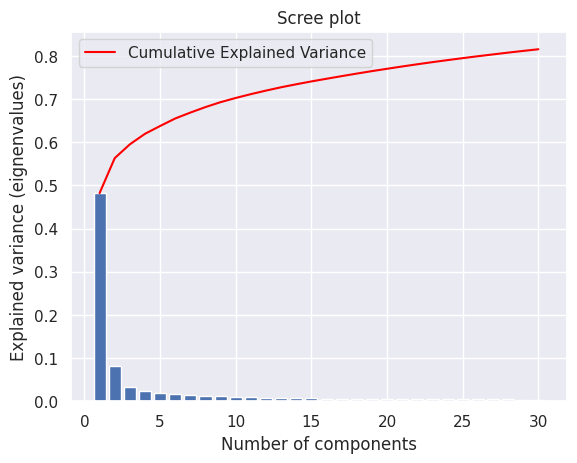

[0.48232375 0.08102762 0.03195893 0.02437516 0.01810449 0.01743586
 0.01364014 0.01278199 0.011418   0.00969485 0.00886127 0.00820769
 0.0077358  0.00691698 0.00660897 0.00615657 0.00607374 0.00591681
 0.00571143 0.00541074 0.00533716 0.00512234 0.00492982 0.00470704
 0.00456443 0.00442516 0.0041916  0.00416848 0.00398196 0.00381653]
[0.48232375 0.56335137 0.5953103  0.61968545 0.63778994 0.6552258
 0.66886594 0.68164793 0.69306593 0.70276077 0.71162204 0.71982973
 0.72756553 0.73448251 0.74109148 0.74724805 0.75332179 0.7592386
 0.76495004 0.77036077 0.77569793 0.78082027 0.7857501  0.79045714
 0.79502157 0.79944673 0.80363833 0.80780681 0.81178878 0.8156053 ]


In [242]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
 
from sklearn.decomposition import PCA
sns.set()
 
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_ratio_)+1),
    pca.explained_variance_ratio_
    )
 
plt.plot(
    range(1,len(pca.explained_variance_ratio_ )+1),
    np.cumsum(pca.explained_variance_ratio_),
    c='red',
    label='Cumulative Explained Variance')
 
plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained variance (eignenvalues)')
plt.title('Scree plot')
 
plt.show()

print(pca.explained_variance_ratio_)
print(np.cumsum(pca.explained_variance_ratio_))

Para explicar el 80% de la varianza solo se necesitan casi 30 componentes

Text(0.5, 0, 'PC3')

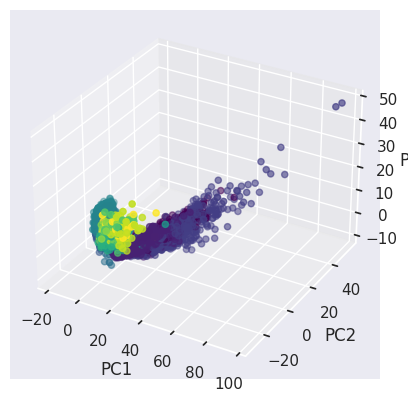

In [243]:
# Prepare 3D graph
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(pca_df["PC1"], pca_df["PC2"], pca_df["PC3"], c=y_train_har, cmap='viridis')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

<Axes: xlabel='PC1', ylabel='PC2'>

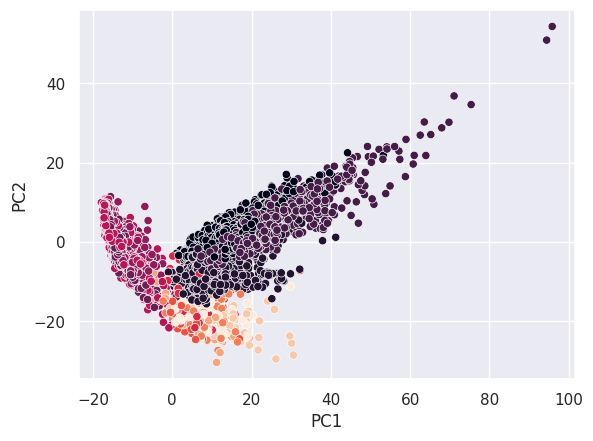

In [244]:
sns.scatterplot(data = pca_df, x = 'PC1', y = 'PC2', c = y_train_har)

Uso K-Means sobre los PC 1 y 2 que son los relevantes.

<Axes: xlabel='PC1', ylabel='PC2'>

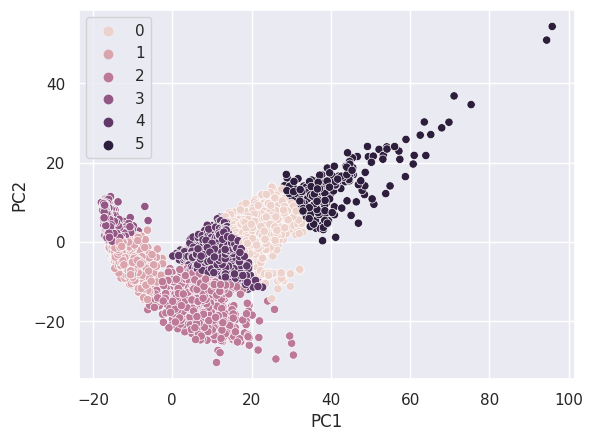

In [245]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6).fit(pca_df[["PC1", "PC2"]])

sns.scatterplot(data = pca_df, x = 'PC1', y = 'PC2', hue = kmeans.labels_)

<Axes: xlabel='PC1', ylabel='PC2'>

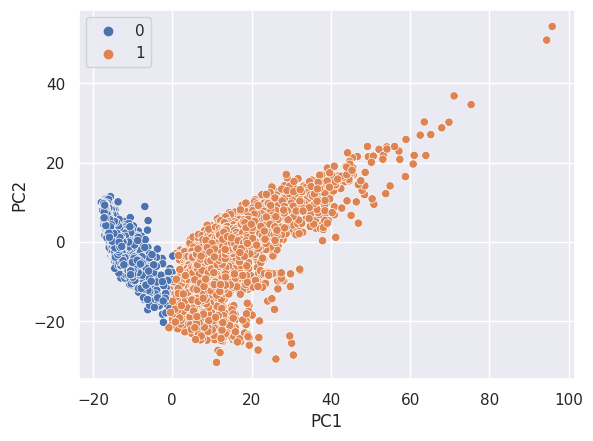

In [246]:
kmeans = KMeans(n_clusters=2).fit(pca_df[["PC1", "PC2"]])

sns.scatterplot(data = pca_df, x = 'PC1', y = 'PC2', hue = kmeans.labels_)

#### MNIST

In [247]:
from sklearn import datasets
digits = datasets.load_digits()

X_digits = pd.DataFrame(data=digits['data'], columns=digits['feature_names'])
y_digits = pd.DataFrame(data=digits['target'])

In [248]:
X_digits.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [249]:
y_digits

,0
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


In [250]:
scaler = StandardScaler()
scaler.fit(X_digits)

X_digits_scaled = pd.DataFrame(scaler.transform(X_digits))

X_digits_scaled.describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1797.000000,1.797000e+03,1.797000e+03,1.797000e+03,...,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03,1.797000e+03
mean,0.0,-6.326480e-17,7.908099e-17,3.163240e-17,-5.535670e-17,-5.535670e-17,0.000000,1.581620e-17,-2.767835e-17,2.372430e-17,...,-7.908099e-18,2.372430e-17,-1.186215e-17,-3.954050e-17,-6.326480e-17,-1.818863e-16,4.349455e-17,4.942562e-17,9.885124e-17,1.581620e-17
std,0.0,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278,1.000278e+00,1.000278e+00,1.000278e+00,...,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00
min,0.0,-3.350165e-01,-1.094937e+00,-2.786437e+00,-2.764242e+00,-1.020657e+00,-0.409724,-1.250229e-01,-5.907756e-02,-6.240093e-01,...,-7.574358e-01,-2.097851e-01,-2.359646e-02,-2.990813e-01,-1.089383e+00,-2.764171e+00,-2.394110e+00,-1.146647e+00,-5.056698e-01,-1.960075e-01
25%,0.0,-3.350165e-01,-8.845657e-01,-4.321998e-01,-4.311703e-01,-1.020657e+00,-0.409724,-1.250229e-01,-5.907756e-02,-6.240093e-01,...,-7.574358e-01,-2.097851e-01,-2.359646e-02,-2.990813e-01,-8.933661e-01,-2.490095e-01,-3.667712e-01,-1.146647e+00,-5.056698e-01,-1.960075e-01
50%,0.0,-3.350165e-01,-2.534522e-01,2.740715e-01,2.687512e-01,-3.145470e-01,-0.409724,-1.250229e-01,-5.907756e-02,-6.240093e-01,...,-5.541027e-01,-2.097851e-01,-2.359646e-02,-2.990813e-01,-3.053152e-01,2.082926e-01,4.441644e-01,-1.295226e-01,-5.056698e-01,-1.960075e-01
75%,0.0,-3.350165e-01,7.984036e-01,7.449191e-01,7.353655e-01,9.211453e-01,-0.409724,-1.250229e-01,-5.907756e-02,3.148782e-01,...,6.658963e-01,-2.097851e-01,-2.359646e-02,-2.990813e-01,8.707865e-01,8.942457e-01,8.496321e-01,8.876023e-01,-1.660165e-02,-1.960075e-01
max,0.0,8.485857e+00,2.271002e+00,9.803428e-01,9.686727e-01,1.803783e+00,4.402524,1.433847e+01,2.117340e+01,4.383391e+00,...,2.495895e+00,1.299989e+01,4.237924e+01,9.336462e+00,2.046888e+00,8.942457e-01,8.496321e-01,1.565686e+00,3.406875e+00,8.407974e+00


In [251]:
components = 25

pca = PCA(n_components=components)
 
pca_features = pca.fit_transform(X_digits_scaled)
 
print('Shape before PCA: ', X_digits_scaled.shape)
print('Shape after PCA: ', pca_features.shape)
 
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=[f'PC{i + 1}' for i in range(components)])

pca_df['target'] = y_digits

pca_df

Shape before PCA:  (1797, 64)
Shape after PCA:  (1797, 25)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,target
0,1.914214,-0.954508,-3.946035,2.028722,-0.267136,0.530181,-1.415152,1.496238,0.124467,-0.822237,...,0.187221,-0.088835,0.405449,0.420787,0.448738,0.558967,0.526095,-0.703720,-0.681571,0
1,0.588979,0.924644,3.924756,-1.779819,-0.993712,-0.675645,1.878229,0.556875,1.078932,0.087238,...,-0.097613,-0.414483,0.552226,-0.054238,0.911830,-0.200623,-0.428818,0.545683,0.842250,1
2,1.302036,-0.317175,3.023329,-2.043315,-2.081501,0.935052,-1.296887,1.156846,0.784035,-1.099408,...,-0.235004,-0.457195,-1.073291,-1.128493,-0.519679,0.116730,-1.222294,-0.310390,-0.473050,2
3,-3.020769,-0.868784,-0.801741,-2.187104,-0.556541,0.727265,0.960435,-1.383099,0.260696,0.745598,...,-0.955882,-0.410324,1.493511,0.292612,0.558673,-0.191377,0.493576,-0.688485,-0.022869,3
4,4.528949,-1.093479,0.973119,-1.419505,-1.715103,1.431550,1.073628,-0.968228,-1.660346,1.174533,...,-0.094926,-0.548735,1.618515,1.095796,0.490914,-0.209526,0.962259,-0.196822,1.014319,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.104330,0.255028,-3.765858,-1.946970,-0.190210,-0.555913,0.530833,0.476560,1.151311,-0.473151,...,0.507255,0.361875,-0.962481,0.819257,0.030377,-0.790042,-0.664489,0.022987,-0.327001,9
1793,2.423235,-1.429613,-3.045244,2.632081,-0.822799,0.004080,-1.106763,2.330489,0.569670,-1.653952,...,0.300122,-0.314263,-0.302940,0.111722,-0.958685,-0.074673,0.345520,0.035153,0.428710,0
1794,1.022600,-0.147922,2.469971,-0.620346,-0.971567,-0.007449,0.381552,0.528288,2.056202,-2.037819,...,1.117446,0.658128,-1.607997,0.160502,0.169354,-0.307834,-0.041706,0.198066,0.158912,8
1795,1.076053,-0.380901,-2.455484,-1.311973,0.253268,-0.638410,1.034143,0.763695,1.075990,-0.334175,...,1.691570,0.816145,-1.777089,0.782672,-0.133828,-0.430982,1.139747,0.404563,-1.238414,9


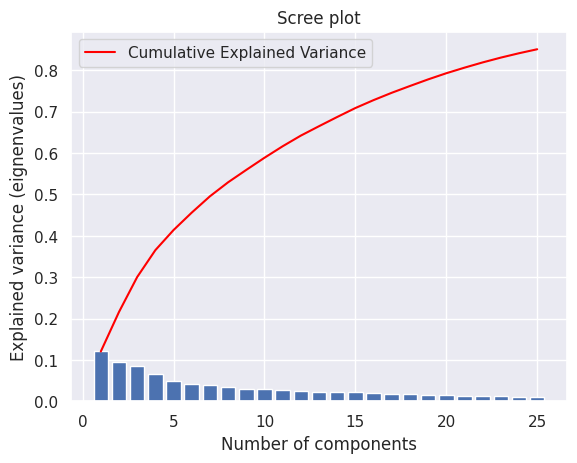

[0.12033916 0.09561054 0.08444415 0.06498408 0.04860155 0.0421412
 0.03942083 0.0338938  0.0299822  0.02932002 0.02781805 0.02577051
 0.02275302 0.02227134 0.02165212 0.01914155 0.01775524 0.01638028
 0.01596405 0.01489073 0.01347922 0.01269617 0.01164108 0.01055216
 0.00965868]
[0.12033916 0.21594971 0.30039385 0.36537793 0.41397948 0.45612068
 0.49554151 0.52943531 0.55941751 0.58873753 0.61655558 0.64232609
 0.66507911 0.68735045 0.70900256 0.72814411 0.74589935 0.76227963
 0.77824369 0.79313442 0.80661364 0.81930982 0.8309509  0.84150306
 0.85116174]


In [252]:
sns.set()
 
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_ratio_)+1),
    pca.explained_variance_ratio_
    )
 
plt.plot(
    range(1,len(pca.explained_variance_ratio_ )+1),
    np.cumsum(pca.explained_variance_ratio_),
    c='red',
    label='Cumulative Explained Variance')
 
plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained variance (eignenvalues)')
plt.title('Scree plot')
 
plt.show()

print(pca.explained_variance_ratio_)
print(np.cumsum(pca.explained_variance_ratio_))

Se necesitan aproximandamente 21 componentes para explicar el 80% de la varianza

Text(0.5, 0, 'PC3')

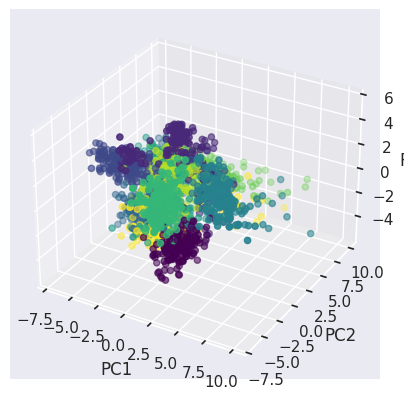

In [253]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(pca_df["PC1"], pca_df["PC2"], pca_df["PC3"], c=y_digits, cmap='viridis')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

<Axes: xlabel='PC1', ylabel='PC2'>

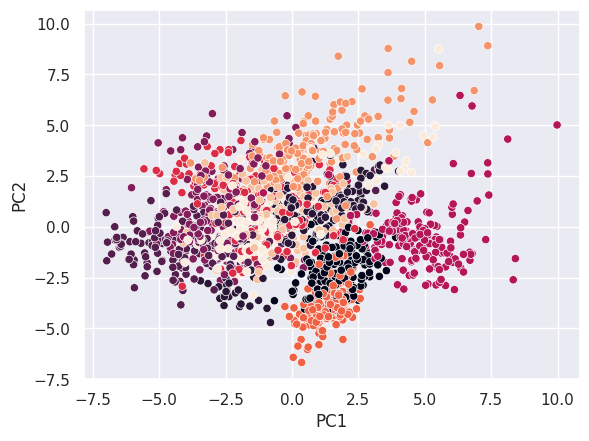

In [254]:
sns.scatterplot(data = pca_df, x = 'PC1', y = 'PC2', c = y_digits)

<Axes: xlabel='PC1', ylabel='PC2'>

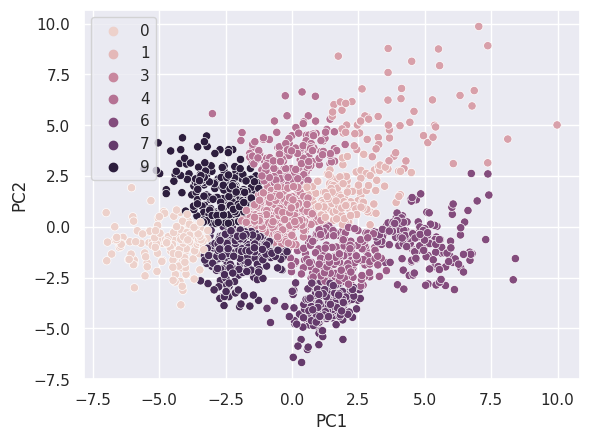

In [255]:
kmeans = KMeans(n_clusters=10).fit(pca_df[["PC1", "PC2"]])

sns.scatterplot(data = pca_df, x = 'PC1', y = 'PC2', hue = kmeans.labels_)

<Axes: xlabel='PC1', ylabel='PC2'>

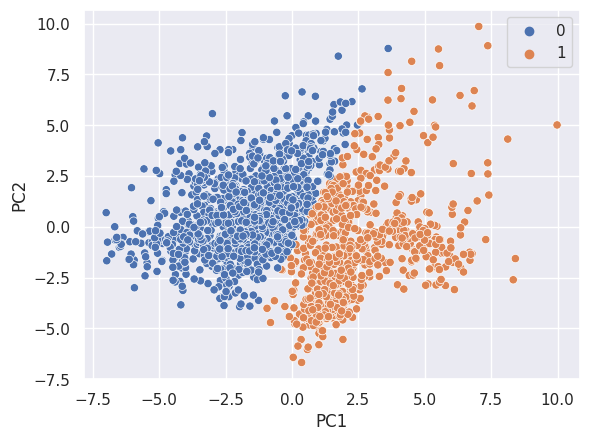

In [256]:
kmeans = KMeans(n_clusters=2).fit(pca_df[["PC1", "PC2"]])

sns.scatterplot(data = pca_df, x = 'PC1', y = 'PC2', hue = kmeans.labels_)

La ganancia de hacer un analisis de k-means con las dos componentes principales es que se logra reducir la dimensionalidad del problema y en funcion a esa reduccion se logran agrupar a los datos. Si se compara la data (con sus labels reales) y los clusters que arma el algoritmo de k-means se observa que se logran armar algunos clusters que son parecidos (aunque con un error relevante) a la data real.

## Segunda Parte (Clase 3 y 4)

In [257]:
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenamiento de modelos de prueba
from sklearn.linear_model import LinearRegression

# Evaluación de modelos de prueba
from sklearn.metrics import mean_squared_error

# Crear datasets
from sklearn.datasets import make_regression

Vamos a crear un dataset sintetico utilizando las librerias de [Sklearn Datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html), en particular nos interesa crear un problema de regresion
lineal al que podemos variarle sus parametros

In [258]:
# Creamos un dataset de prueba
X, y = make_regression(n_samples = 1000,
                       n_features = 1,
                       noise = 2,
                       n_informative = 1,
                       random_state = 42)

new_data = np.append(X,y.reshape(-1,1),axis=1)
new_data.shape

(1000, 2)

In [259]:
df = pd.DataFrame(new_data)

new_col = []
i = 0
for col in df.columns:
    if i ==  len(df.columns) - 1:
        new_col.append("target")
    else :
        new_col.append("feature_" + str(i+1))
        
    i += 1
    
df.columns = new_col

df.head()

,feature_1,target
0,-1.758739,-30.118736
1,1.031845,14.526197
2,-0.487606,-10.119305
3,0.186454,1.700188
4,0.725767,12.345314


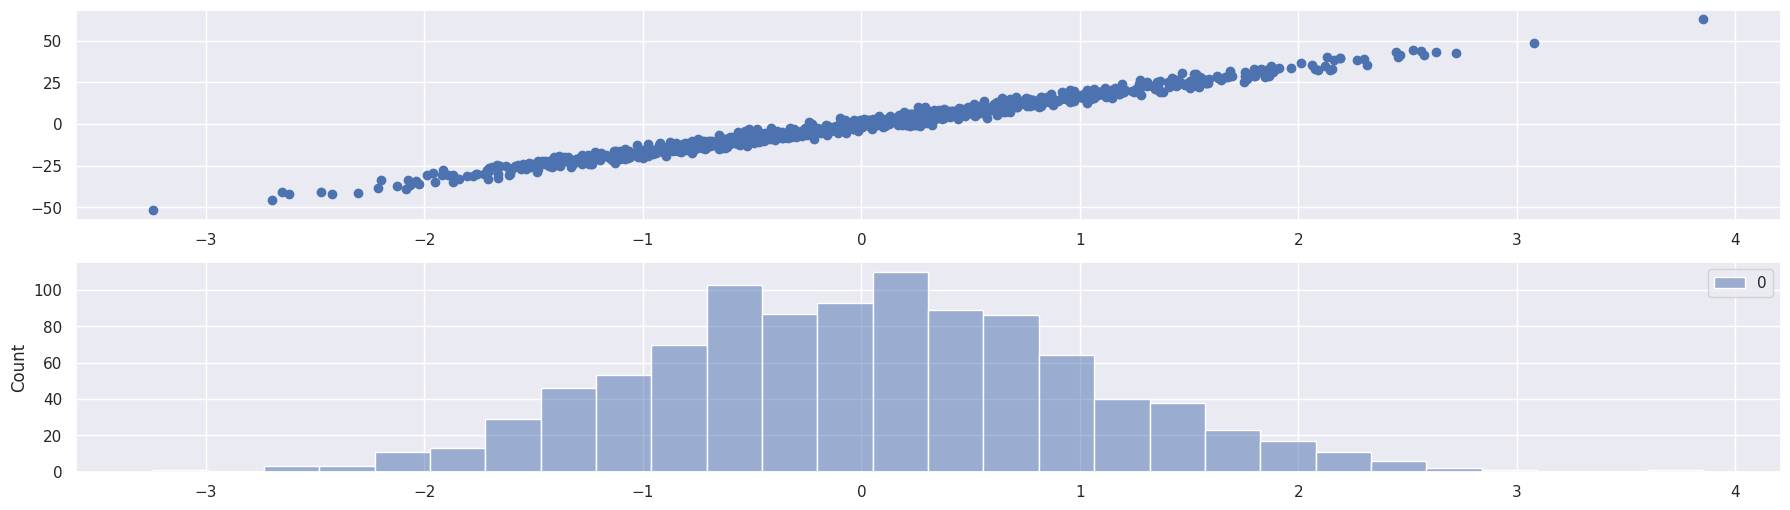

In [260]:
fig,axes = plt.subplots(2,figsize=(22,6))
axes[0].scatter(X,y)
sns.histplot(X, ax=axes[1]);

### Funciones auxiliares para generar datos anómalos

In [261]:
def generate_outliers(df: pd.DataFrame,
                     cols: list = None,
                     extreme_outlier: bool = False,
                     two_tailed: bool = False,
                     percentage: float = 0.02) -> pd.DataFrame:
  """Con esta función vamos a poder generar outliers en ciertas columnas de nuestro
  dataset. Si le damos True a _extreme_outlier_ va a generar outliers con mucho
  peso en la regresión (puede ser bilateral o unilateral segun _two_tailed_)
  """  
  seeds = np.random.randint(100, size = len(df))
  
  nsamples = np.math.floor(len(df) * percentage)
  idx_to_change = df.sample(n = nsamples).index

  cols = df.columns.tolist() if cols is None else cols

  result = df.copy(deep = True)
  
  for i,col_name in enumerate(cols):
    np.random.seed(seeds[i])

    iqr = result[col_name].quantile(0.75) - result[col_name].quantile(0.25)

    lb = result[col_name].quantile(0.25) - 1 * iqr
    ub = result[col_name].quantile(0.75) + 1 * iqr

    if two_tailed:
      outs = result[col_name].loc[(result[col_name] < lb) | (result[col_name] > ub)]
    else:
      outs = result[col_name].loc[(result[col_name] > ub)]
    
    out_size = len(outs)
    if out_size < nsamples:
      nsamples = out_size

    idx_to_change = outs.sample(nsamples, replace = False).index
    
    if extreme_outlier:
      outlier_sign = [1 if np.random.random() < 0.9 else -1 for _ in range(nsamples)]
      
      result[col_name].loc[idx_to_change] = np.multiply(outlier_sign,
                                                        np.random.uniform(low = result[col_name].mean(),
                                                                          high = result[col_name].max()*5,
                                                                          size = nsamples)
                                                        )
      result['target'].loc[idx_to_change] = np.multiply(outlier_sign,
                                                        np.random.uniform(low = result['target'].mean(),
                                                                          high = result['target'].max()*2,
                                                                          size = nsamples)
                                                        )
    else:
      samples = result[col_name].loc[idx_to_change].values
      np.random.shuffle(samples)
      result[col_name].loc[idx_to_change] = samples
  
  return result

In [262]:
df_outlier = generate_outliers(df,['feature_1'], percentage = 0.05, extreme_outlier = True, two_tailed= True)

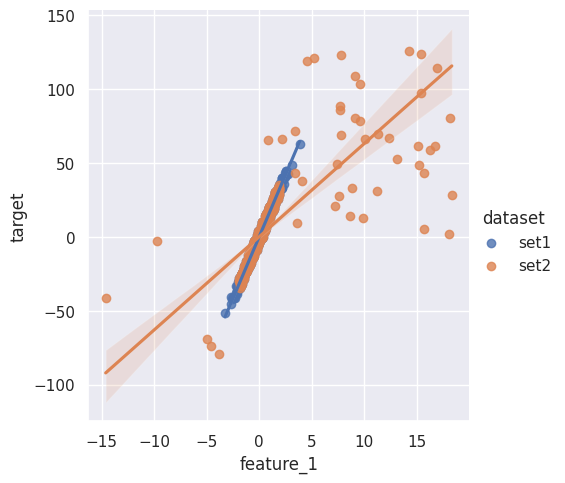

In [263]:
sns.lmplot(data = pd.concat([df.assign(dataset = 'set1'),
                                 df_outlier.assign(dataset = 'set2')]),
                x = 'feature_1',
                y = 'target',
                hue = 'dataset')

### Quinto ejercicio

Crear una función que separe los datos en train-validation-test 70-20-10


Hints: 

* Usar Indexing y slicing
* Usar np.random.[...]

In [264]:
def split(df: pd.DataFrame, train_size: float):
    
    randomized_df = df.iloc[np.random.permutation(df.index)].reset_index(drop=True)

    target_column = "target"

    rows = randomized_df.shape[0]
    train = randomized_df.iloc[0:int(rows*0.7)]
    test = randomized_df.iloc[int(rows*0.7):int(rows*0.9)]
    val = randomized_df.iloc[int(rows*0.9):rows]

    X_train = train.drop(target_column, axis=1)
    X_val = val.drop(target_column, axis=1)
    X_test = test.drop(target_column, axis=1)

    Y_train = train["target"]
    Y_val = val["target"]
    Y_test = test["target"]

    return X_train, X_val, X_test, Y_train, Y_val, Y_test

X_train, X_val, X_test, Y_train, Y_val, Y_test = split(df, 2)
print(f"X_train:\n {X_train} \n X_val:\n {X_val} X_test:\n {X_test} \n")

X_train:
      feature_1
0     1.003533
1     0.521942
2     0.492451
3    -0.465730
4     0.493318
..         ...
695  -1.380101
696   0.207688
697   0.171368
698  -0.322062
699   0.650201

[700 rows x 1 columns] 
 X_val:
      feature_1
900  -0.234153
901   0.224092
902  -1.191303
903   0.615936
904  -1.081548
..         ...
995  -0.024125
996   1.964725
997   0.412931
998  -0.611518
999  -0.264657

[100 rows x 1 columns] X_test:
      feature_1
700  -0.420645
701  -0.013497
702   0.005113
703   2.526932
704  -0.677162
..         ...
895  -0.651600
896  -0.783253
897   0.959271
898  -1.057711
899  -0.662624

[200 rows x 1 columns] 



### Sexto ejercicio

Utilizando la funcion `generate_outliers` generar puntos extremos dentro de los datos que generamos anteriormente. En este ejercicio dejar setteado `extreme_outliers` como `False` y observe como variando el porcentaje de los mismos la regresión comienza a afectarse.

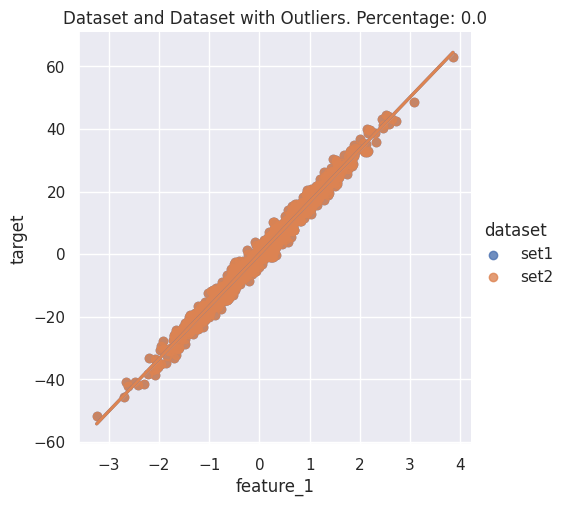

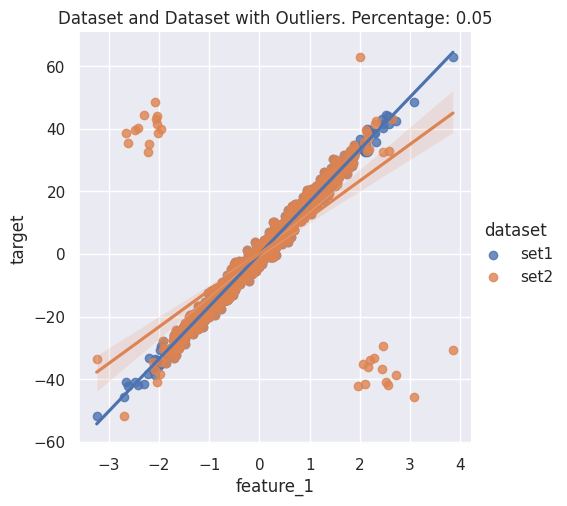

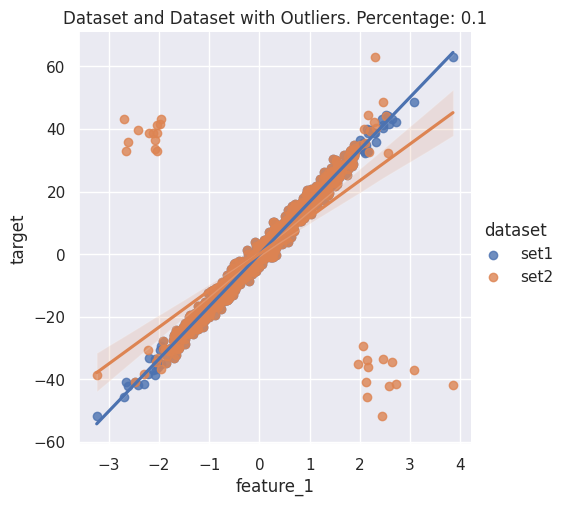

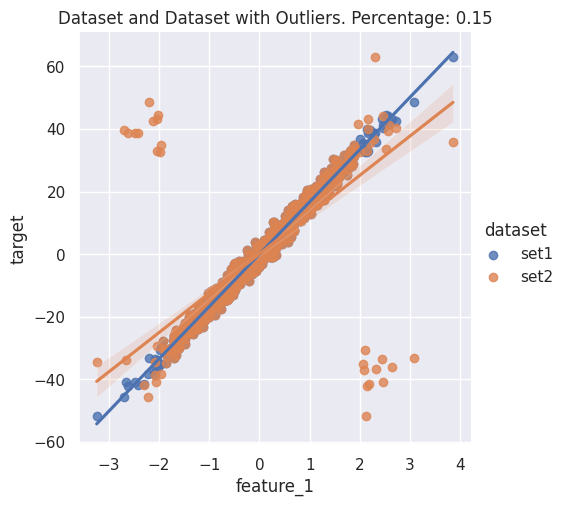

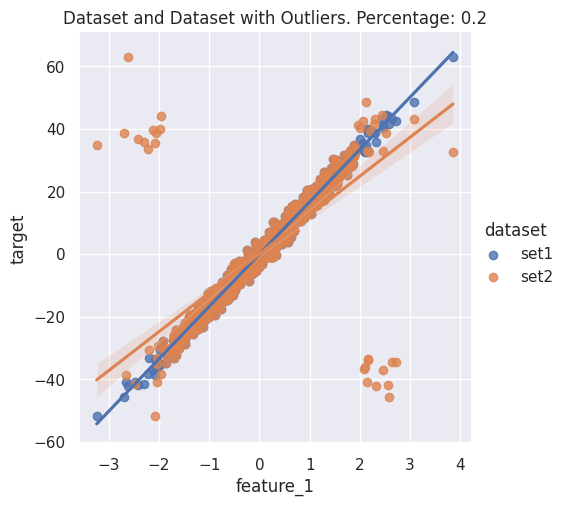

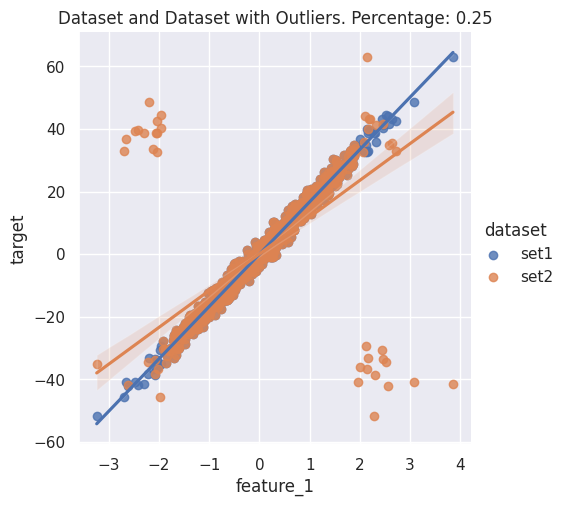

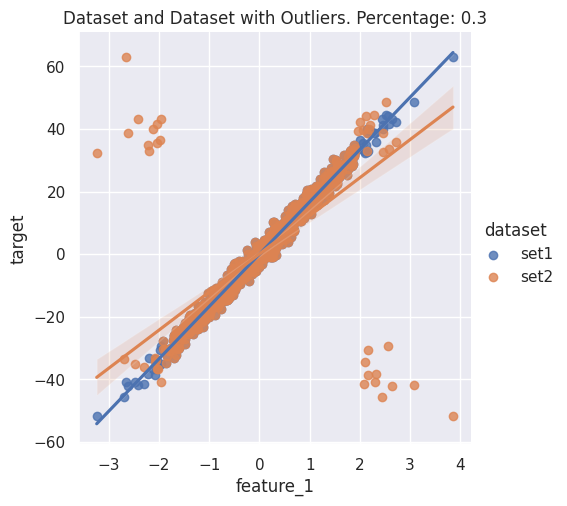

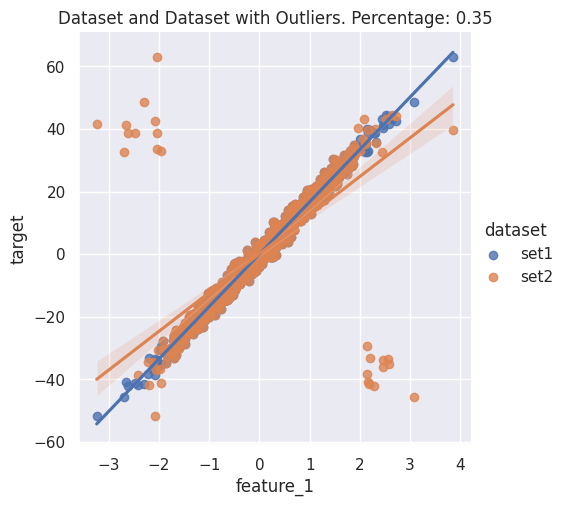

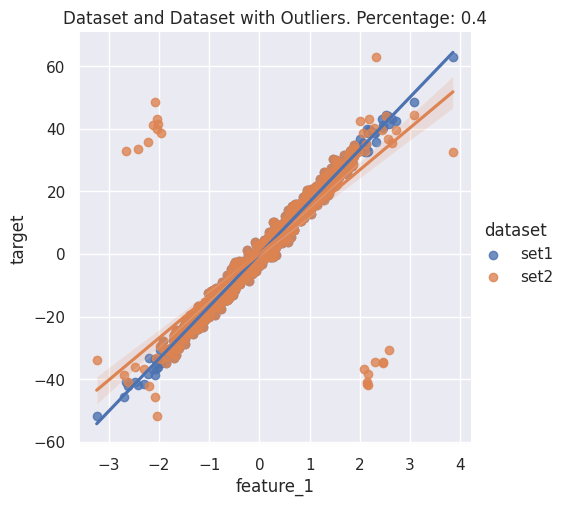

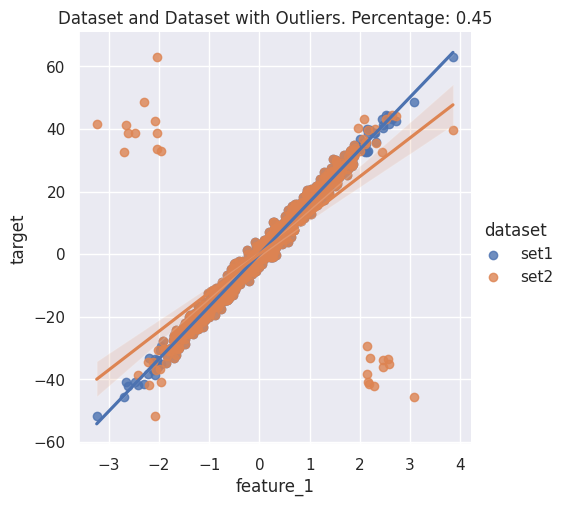

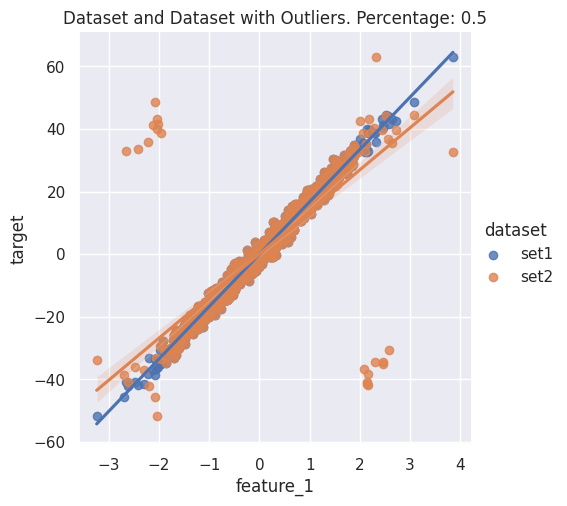

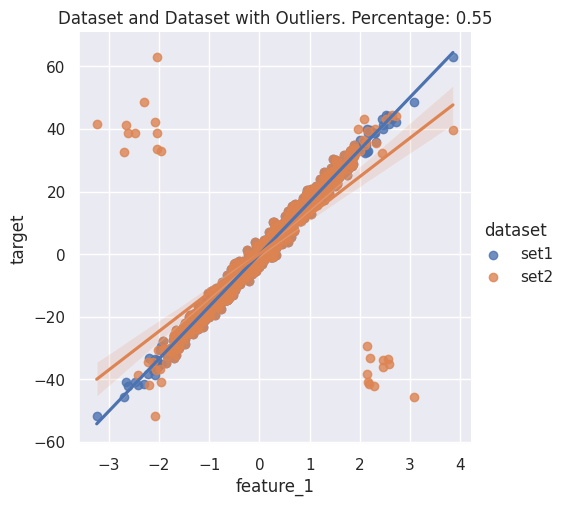

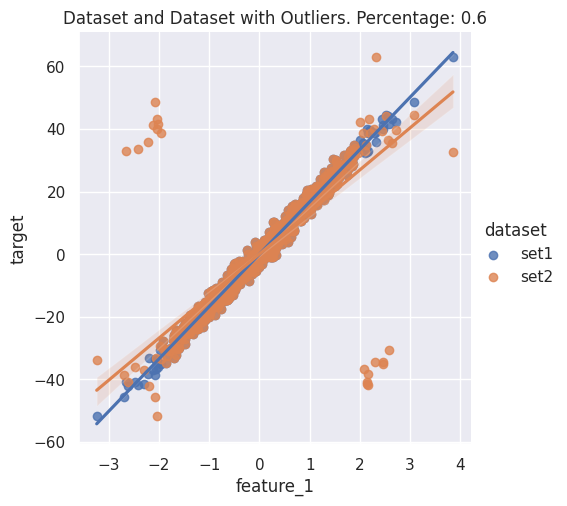

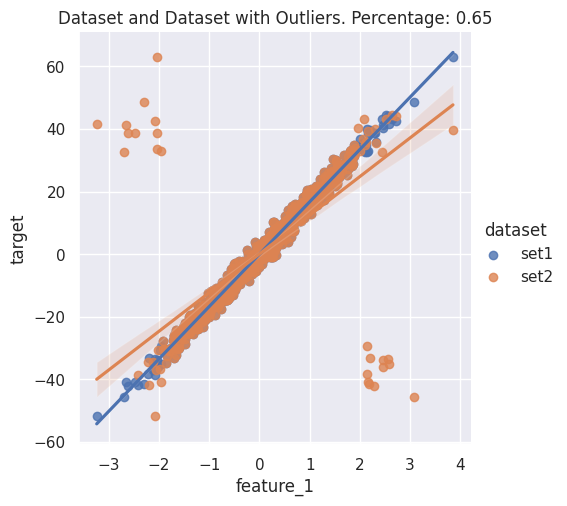

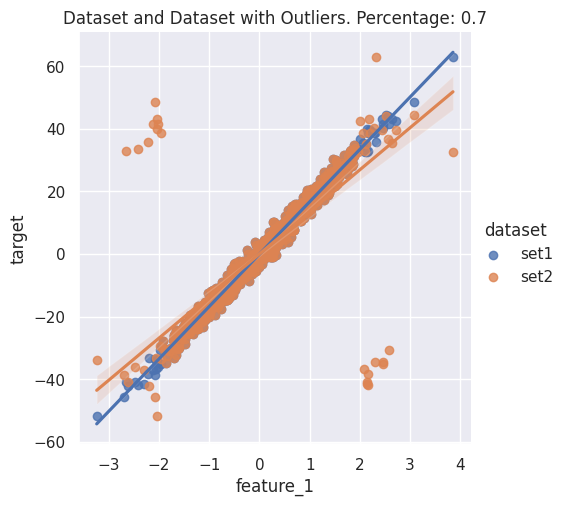

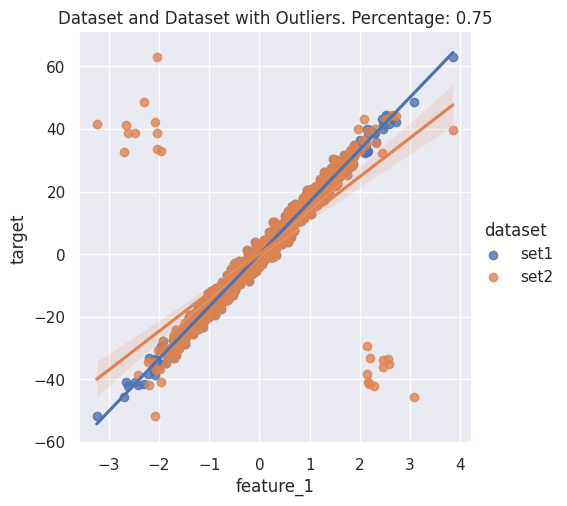

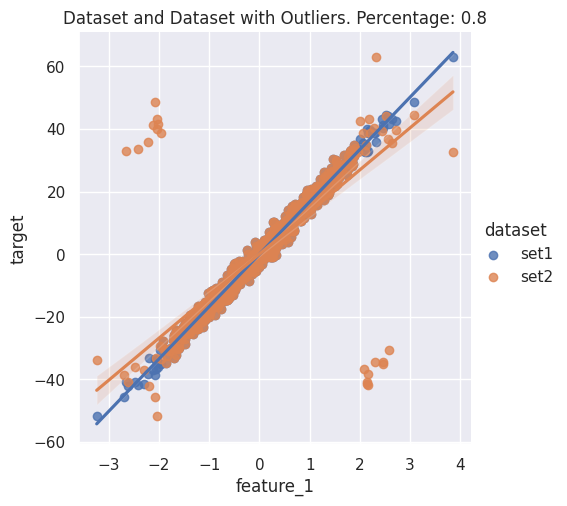

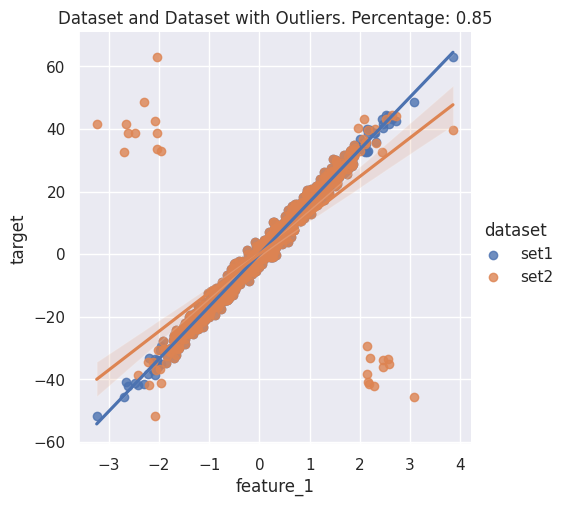

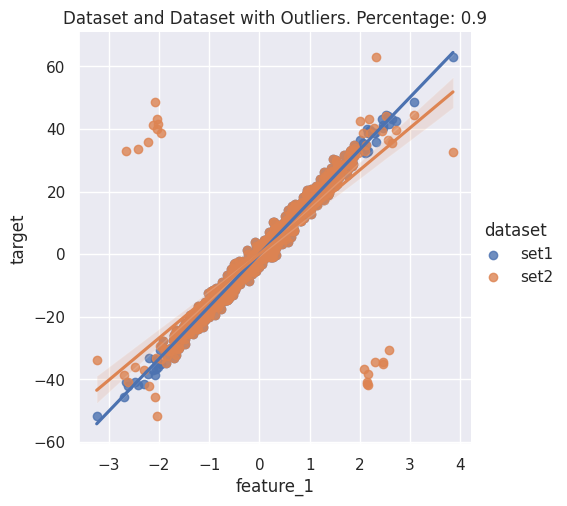

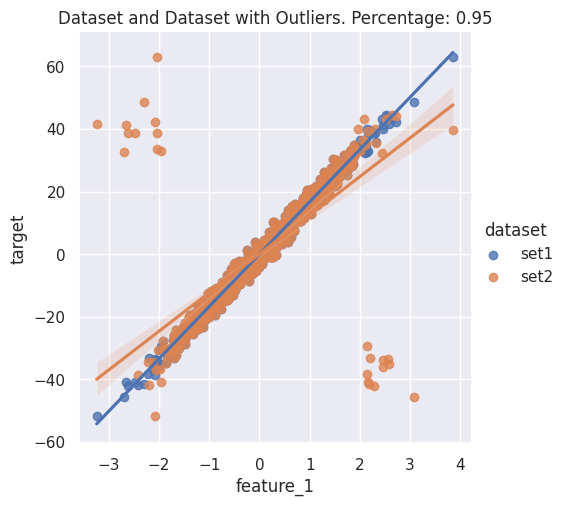

In [265]:

for percentage in range(0, 100, 5):
    df_with_outliers = generate_outliers(df,['feature_1'], percentage = percentage/100, extreme_outlier = False, two_tailed= True)
    sns.lmplot(data = pd.concat([df.assign(dataset = 'set1'),
                                    df_with_outliers.assign(dataset = 'set2')]),
                    x = 'feature_1',
                    y = 'target',
                    hue = 'dataset').set(title=f'Dataset and Dataset with Outliers. Percentage: {percentage/100}')


## Tercera Parte (Clase 5, 6 y 7)

La ultima parte la van a poder encontrar en el archivo `template_tp_integrador_tercera_parte.ipynb`